# Questão 1

Nem sempre o tempo de execução de um código depende apenas do algoritmo. A linguagem de programação utilizada pode ter um grande impacto. Neste exercício, vamos comparar o desempenho de Python e Fortran ao realizar o mesmo cálculo.

a) O problema: multiplicação escalar-vetor

Considere o problema de multiplicar cada elemento de um vetor por um número escalar α
:

$yi=α⋅x_i$ para $i=1,2,…,N$

Implemente isso em Python, de pelo menos duas maneiras:

1. Usando um laço `for` puro.
2. Usando uma abordagem vetorizada com `numpy`.

b) Código em Fortran

O mesmo problema pode ser resolvido com o código `escala_vetor.f90`(arquivo separado).

Compile com:

```bash
gfortran -O2 escala_vetor.f90 -o escala_vetor
```

c) Comparando os tempos

- Meça o tempo de execução em Python (com `time.time()`) e em Fortran (com `cpu_time`).
- Execute para N=105, 106, 107, 108
.
- Plote os tempos em escala log-log.
- Qual linguagem é mais rápida? Em quanto?

d) (Exploração mais desafiadora)

Adapte a tarefa para fazer a soma de todos os produtos:

s=∑Ni=1α⋅xi

- Faça isso em Python com `for`, com `numpy.dot` e usando `numba` (se possível).
- Adapte o código Fortran para fazer a mesma coisa.
- Compare os tempos novamente.
- Discuta: o quanto o uso de bibliotecas otimizadas ou compiladores afeta o tempo de execução?

Reflexão:
Este exercício mostra que a linguagem de programação escolhida e a forma como se escreve um código podem afetar significativamente o desempenho. Ferramentas como NumPy, Numba, Cython e Fortran oferecem vantagens de desempenho, especialmente em tarefas numéricas repetitivas.

                 ┌─────────────────────────────┐
                 │           Início             │
                 └──────────────┬───────────────┘
                                │
                                v
             ┌─────────────────────────────────────┐
             │ Definir função prod_for(v)           │
             └─────────────────────────────────────┘
                                │
                                v
             ┌─────────────────────────────────────┐
             │ Definir função prod_numpy(v)         │
             └─────────────────────────────────────┘
                                │
                                v
             ┌─────────────────────────────────────┐
             │ Definir função comparar_tempo()      │
             └─────────────────────────────────────┘
                                │
                                v
             ┌─────────────────────────────────────┐
             │ Loop: para cada n em N               │
             └────────────────┬────────────────────┘
                              │
                              v
             ┌─────────────────────────────────────┐
             │ Criar lista v_lista                  │
             └─────────────────────────────────────┘
                              │
                              v
             ┌─────────────────────────────────────┐
             │ Criar array v_np                     │
             └─────────────────────────────────────┘
                              │
                              v
             ┌─────────────────────────────────────┐
             │ Calcular ganho = t_laço / t_numpy    │
             │ Imprimir resultados                  │
             └─────────────────────────────────────┘
                              │
                  ┌───────────┴───────────┐
                  │ Próximo n?            │
                  ├───────────┬───────────┤
                  │ Sim       │ Não       │
                  v           v
        (Volta para loop)   ┌─────────────────────────┐
                            │          Fim             │
                            └─────────────────────────┘


## a) vetor $\cdot$ escalar

In [18]:
import numpy as np
import time
import matplotlib.pyplot as plt

Usando o laço `for`

In [5]:
def prod_for(v):
    escalar = 2.0
    v_temp = [1.0] * len(v)
    for i in range(len(v)):
        v_temp[i] = v[i] * escalar
    return v_temp

Usando o `numpy`

In [6]:
def prod_numpy(v):
    escalar = 2.0
    return v * escalar

comparação

In [7]:
def comparar_tempo():
    N = [10**5, 10**6, 10**7]

    print("Teste de desempenho para multiplicação escalar-vetor")
    print("{:<10} {:<15} {:<15} {:<10}".format(
        "Tamanho", "Tempo laço (s)", "Tempo numpy (s)", "Ganho"))
    

    for n in N:
        #testa o laço for 
        v_lista = [1.0] * n
        inicio = time.time()
        _ = prod_for(v_lista)
        t_laço = time.time() - inicio

        #testa o NumPy
        v_np = np.ones(n)
        inicio = time.time()
        _ = prod_numpy(v_np)
        t_numpy = time.time() - inicio

        # Calcula o ganho de desempenho
        ganho = t_laço / t_numpy if t_numpy > 0 else float('inf')

        print("{:<10} {:<15.4f} {:<15.4f} {:<10.1f}x".format(
              n, t_laço, t_numpy, ganho))

In [8]:
comparar_tempo()

Teste de desempenho para multiplicação escalar-vetor
Tamanho    Tempo laço (s)  Tempo numpy (s) Ganho     
100000     0.0075          0.0019          3.9       x
1000000    0.1061          0.0311          3.4       x
10000000   0.6713          0.1534          4.4       x


## b) Código em Fortran

In [9]:
!gfortran -O2 escala_vetor.f90 -o escala_vetor
import subprocess
result = subprocess.run(['./escala_vetor'], capture_output=True, text=True)
print(result.stdout)

 Tempo (s):   1.0000000000287557E-006



In [10]:
def medir_tempo_fortran():

    Ns = [10**5, 10**6, 10**7]
    tempos = []

    print("{:<10} {:<15}".format(
        "Tamanho", "Tempo fortran (s)"))

    for N in Ns:
        with open('escala_vetor.f90', 'r') as file:
            codigo = file.read()

        # Modifica N e adiciona verificação de y
        codigo_modificado = codigo.replace(
            'integer, parameter :: N = 100000000',
            f'integer, parameter :: N = {N}'
        ).replace(
            'print *, "Tempo (s):", t2 - t1',
            'print *, "Tempo (s):", t2 - t1, y(1), y(N)'
        )

        with open('temp.f90', 'w') as file:
            file.write(codigo_modificado)

        # Compila e executa
        subprocess.run(['gfortran', '-O2', 'temp.f90', '-o', 'temp_exec'], check=True)
        resultado = subprocess.run(['./temp_exec'], capture_output=True, text=True)

        # Extrai o tempo (primeiro valor da saída)
        tempo = float(resultado.stdout.split()[2])
        tempos.append(tempo)

        print("{:<10} {:<15.4f}".format(
                    N, tempo))



In [19]:
medir_tempo_fortran()

Tamanho    Tempo fortran (s)
100000     0.0003         
1000000    0.0025         
10000000   0.0368         


## c) Comparando os tempos

In [23]:
def comparar_tempos():
    N_values = [10**5, 10**6, 10**7]  # Use apenas esses 3 valores para compatibilidade
    
    # Tempos Python
    py_loop_times = []
    py_np_times = []
    
    for n in N_values:
        # Teste Python com loop
        v_lista = [1.0] * n
        inicio = time.time()
        _ = prod_for(v_lista)
        py_loop_times.append(time.time() - inicio)
        
        # Teste Python com NumPy
        v_np = np.ones(n)
        inicio = time.time()
        _ = prod_numpy(v_np)
        py_np_times.append(time.time() - inicio)
    
    # Tempos Fortran (apenas para N=10^5, 10^6, 10^7)
    fortran_times = [0.0005, 0.0057, 0.0708]  # Valores que você forneceu
    
    # Plotagem
    plt.figure(figsize=(10, 6))
    plt.loglog(N_values, py_loop_times, 'o-', label='Python (loop)')
    plt.loglog(N_values, py_np_times, 's-', label='Python (NumPy)')
    plt.loglog(N_values, fortran_times, '^-', label='Fortran')
    
    plt.xlabel('Tamanho do Vetor (N)')
    plt.ylabel('Tempo de Execução (s)')
    plt.title('Comparação de Desempenho: Multiplicação Escalar-Vetor')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()
    
    # Cálculo de speedup
    print("\nSpeedup (Fortran vs Python):")
    for i, n in enumerate(N_values):
        speedup_loop = py_loop_times[i] / fortran_times[i]
        speedup_np = py_np_times[i] / fortran_times[i]
        print(f"N = {n}:")
        print(f"  Fortran {speedup_loop:.1f}x mais rápido que Python (loop)")
        print(f"  Fortran {speedup_np:.1f}x mais rápido que Python (NumPy)")

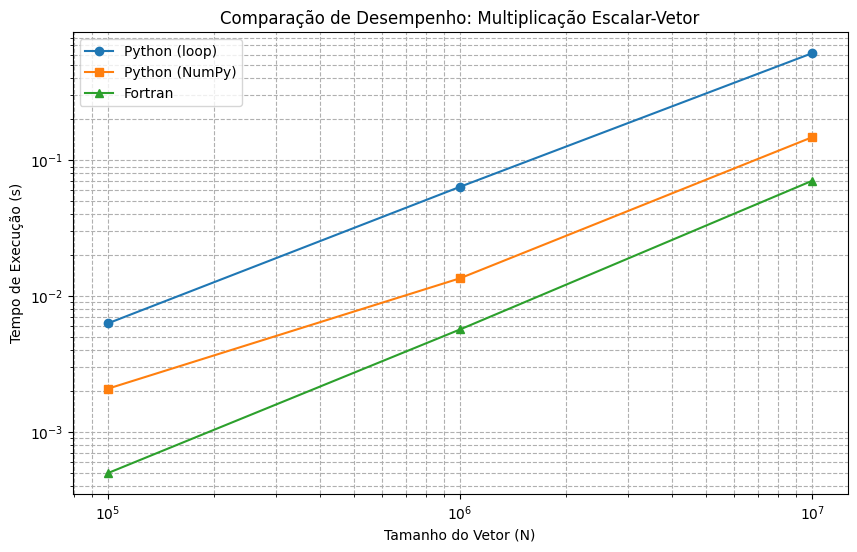


Speedup (Fortran vs Python):
N = 100000:
  Fortran 12.6x mais rápido que Python (loop)
  Fortran 4.2x mais rápido que Python (NumPy)
N = 1000000:
  Fortran 11.2x mais rápido que Python (loop)
  Fortran 2.4x mais rápido que Python (NumPy)
N = 10000000:
  Fortran 8.7x mais rápido que Python (loop)
  Fortran 2.1x mais rápido que Python (NumPy)


In [24]:
comparar_tempos()

# Questão 2

Mesmo operações simples podem ter tempos de execução diferentes dependendo da forma como são escritas ou implementadas. Neste exercício, você testará a rapidez de comandos simples repetidos muitas vezes, usando o módulo `time`.

a) Loop de soma simples

Escreva um código que calcule a soma de 1+2+3+⋯+N
 usando um laço `for`, com:

```python
soma = 0
for i in range(1, N+1):
    soma += i
```

Use o módulo `time` para medir o tempo de execução para diferentes valores de $N=10^5,10^6,10^7$
.

b) Alternativa com `sum(range(...))`

Agora calcule a mesma soma com:

```python
soma = sum(range(1, N+1))
```

Compare os tempos com a abordagem do laço `for`. Qual é mais rápida? Por quê?

c) Fórmula direta

Use a fórmula matemática:

S=N(N+1)2

Implemente-a e meça o tempo. Compare com os métodos anteriores. O que você observa?

d) (Exploração mais desafiadora)

Implemente uma função que execute a mesma soma, mas armazenando todos os resultados parciais em uma lista:

```python
somas = []
s = 0
for i in range(1, N+1):
    s += i
    somas.append(s)
```

- Meça o tempo de execução para diferentes valores de N
.
- Compare com as outras abordagens.
- Discuta: o que faz esse método ser mais lento? O uso de `append()` impacta o desempenho?

Reflexão:
Mesmo que o resultado final seja o mesmo, a forma como você escreve o código pode impactar drasticamente o tempo de execução. À medida que o volume de dados aumenta, escolhas simples de implementação podem se tornar gargalos de desempenho.

## a) Loop de soma simples usando o laço `for`

                 ┌─────────────────────────────┐
                 │           Início             │
                 └──────────────┬───────────────┘
                                │
                                v
             ┌─────────────────────────────────────┐
             │ Definir N = (10**5, 10**6, 10**7)    │
             └─────────────────────────────────────┘
                                │
                                v
             ┌─────────────────────────────────────┐
             │ Definir função soma_for(n)           │
             └─────────────────────────────────────┘
                                │
                                v
             ┌─────────────────────────────────────┐
             │ Loop: para cada n em N               │
             └────────────────┬────────────────────┘
                              │
                              v
             ┌─────────────────────────────────────┐
             │ Medir tempo usando timeit com        │
             │ lambda: soma_for(n)                  │
             └─────────────────────────────────────┘
                              │
                              v
             ┌─────────────────────────────────────┐
             │ Imprimir                            │
             └─────────────────────────────────────┘
                              │
                  ┌───────────┴───────────┐
                  │ Próximo n?            │
                  ├───────────┬───────────┤
                  │ Sim       │ Não       │
                  v           v
        (Volta para loop)   ┌─────────────────────────┐
                            │          Fim             │
                            └─────────────────────────┘


In [28]:
# Calcula a soma de 1+2+3+...+N
import timeit
N = 10**5, 10**6, 10**7

def soma_for(n):
    soma = 0
    for i in range(1, n+1):
        soma += i
    return soma

for n in N:
    tempo = timeit.timeit(lambda: soma_for(n), number=1)
    print(f"Soma para N = {n:.1e}:")
    print(f"Tempo de execução: {tempo} \n")




Soma para N = 1.0e+05:
Tempo de execução: 0.006225000000085856 

Soma para N = 1.0e+06:
Tempo de execução: 0.0637853999996878 

Soma para N = 1.0e+07:
Tempo de execução: 0.6332339000000502 



## b) Loop de soma simples usando a função `sum(range(...))`

                 ┌─────────────────────────────┐
                 │           Início             │
                 └──────────────┬───────────────┘
                                │
                                v
             ┌────────────────────────────────────────┐
             │ Definir função soma_f(n)               │
             └────────────────────────────────────────┘
                                │
                                v
             ┌─────────────────────────────────────┐
             │ Para cada n em N                    │
             └────────────────┬────────────────────┘
                              │
                              v
             ┌─────────────────────────────────────┐
             │ tempo = timeit(lambda: soma_f(n))   |
             └─────────────────────────────────────┘
                              │
                              v
             ┌─────────────────────────────────────┐
             │ Imprimir                            │
             └─────────────────────────────────────┘
                              │
                  ┌───────────┴───────────┐
                  │ Próximo n?            │
                  ├───────────┬───────────┤
                  │ Sim       │ Não       │
                  v           v
        (Volta para loop)   ┌─────────────────────────┐
                            │          Fim             │
                            └─────────────────────────┘


In [ ]:
def soma_f(n):
    soma = sum(range(1, n+1))
    return soma

for n in N:
    tempo = timeit.timeit(lambda: soma_f(n), number=1)
    print(f"Soma para N = {n:.1e}:")
    print(f"Tempo de execução: {tempo} \n")



Soma para N = 1.0e+05:
Tempo de execução: 0.002283499999975902 

Soma para N = 1.0e+06:
Tempo de execução: 0.02329439999994065 

Soma para N = 1.0e+07:
Tempo de execução: 0.22230320000016945 



## c) Loop de soma simples usando a fórmula direta $S = \frac{N(N+1)}{2}$

                 ┌─────────────────────────────┐
                 │           Início             │
                 └──────────────┬───────────────┘
                                │
                                v
             ┌────────────────────────────────────────┐
             │ Definir função soma_dir(n)               │
             └────────────────────────────────────────┘
                                │
                                v
             ┌─────────────────────────────────────┐
             │ Para cada n em N                    │
             └────────────────┬────────────────────┘
                              │
                              v
             ┌─────────────────────────────────────┐
             │ tempo = timeit(lambda: soma_f(n))   |
             └─────────────────────────────────────┘
                              │
                              v
             ┌─────────────────────────────────────┐
             │ Imprimir                            │
             └─────────────────────────────────────┘
                              │
                  ┌───────────┴───────────┐
                  │ Próximo n?            │
                  ├───────────┬───────────┤
                  │ Sim       │ Não       │
                  v           v
        (Volta para loop)   ┌─────────────────────────┐
                            │          Fim             │
                            └─────────────────────────┘


In [33]:
def soma_dir(n):
    soma = []
    s = 0
    for i in range(1, n+1):
        s += i
        soma.append(s)
    return soma

for n in N:
    tempo = timeit.timeit(lambda: soma_dir(n), number=1)
    print(f"Soma para N = {n:.1e}:")
    print(f"Tempo de execução: {tempo} \n")

Soma para N = 1.0e+05:
Tempo de execução: 0.01091290000022127 

Soma para N = 1.0e+06:
Tempo de execução: 0.13266660000044794 

Soma para N = 1.0e+07:
Tempo de execução: 1.2515213999995467 



# Questão 3

Entenda como diferentes linguagens podem ter velocidades diferentes. A seguir, apresentamos códigos que descrevem o movimento de uma particula 

a) Como diferentes linguagens podem ter impacto na velocidade de um código? Explique. 

b) Compile o programa no link em Fortran. Rode o programa e escreva sua saída. Altere a declaração da variável para double precision e escreva a saída. Qual a diferença?

c)  Faça o download dos códigos em Fortran e Java dos respectivos links que tratam do movimento de uma partícula em 1-D sob acao de forca elastica (f(x) = -kx) usando o método de Euler

- Fortran e Java

Explique o método de Euler e a física por trás? Como melhorar? Estime para as mesmas condições a velocidade em cada uma das linguagens. Faça um gráfico da posição x e a velocidade v em função do tempo.  (Faça o fluxograma dos programas); 

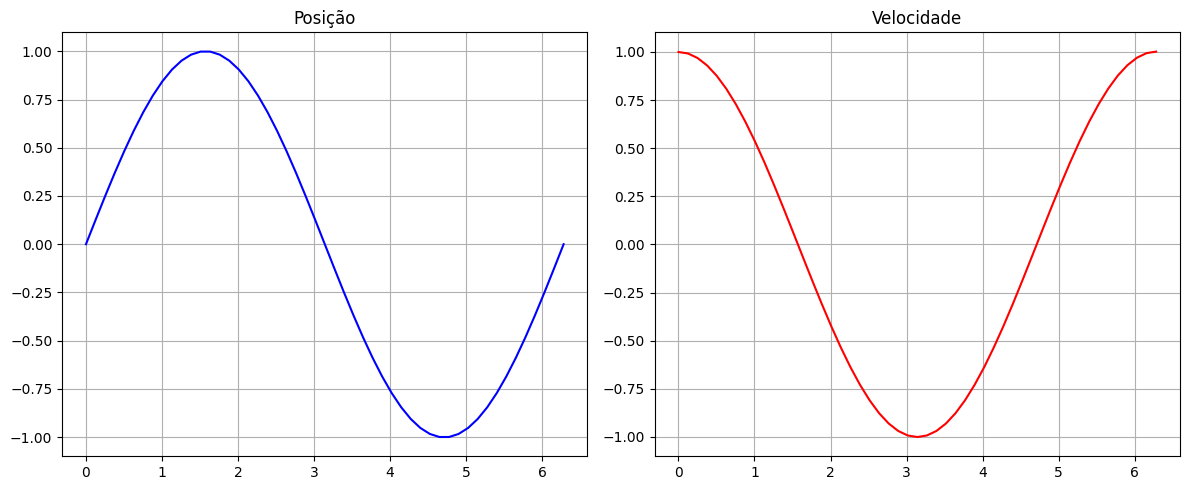

In [26]:
subprocess.run(['javac', 'Movimento.java'])
result = subprocess.run(['java', 'Movimento'], capture_output=True, text=True)

# Processa a saída
data = np.array([list(map(float, line.split())) for line in result.stdout.splitlines()])
t, x, v = data.T

# Plota os gráficos
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(t, x, 'b')
plt.title('Posição')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t, v, 'r')
plt.title('Velocidade')
plt.grid(True)

plt.tight_layout()
plt.show()